In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv("spam.csv",encoding='latin-1')

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
#1.data cleaning
#2.EDA (Exploratory data analysis)
#3.text preprocessing
#4.model building
#5.evaluation
#6.Improvement
#7.deploy

In [6]:
##Data cleaning

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [8]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [9]:
df.sample(5)

,v1,v2
2406,ham,One of best dialogue in cute reltnship..!! \We...
5219,ham,Pls she needs to dat slowly or she will vomit ...
2647,ham,"It,,s a taxt massage....tie-pos argh ok! Lool!"
5465,ham,Shall I bring us a bottle of wine to keep us a...
1470,ham,Take some small dose tablet for fever


In [10]:
#renaming the columns

In [11]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [12]:
df.sample(5)

,target,text
1070,ham,"alright, I'll make sure the car is back tonight"
1454,ham,Can Ì_ all decide faster cos my sis going home...
1717,spam,WOW! The Boys R Back. TAKE THAT 2007 UK Tour. ...
4795,spam,URGENT This is our 2nd attempt to contact U. Y...
1774,ham,"Its ok chikku, and its my 1 of favourite song...."


In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
encoder=LabelEncoder()#encoding ham as 1 and spam as 0

In [15]:
df['target']=encoder.fit_transform(df['target'])

In [16]:
df.sample(5)

,target,text
651,0,I'm gonna say no. Sorry. I would but as normal...
3232,0,Height of recycling: Read twice- People spend ...
4010,1,Please call our customer service representativ...
5180,0,Babe! I fucking love you too !! You know? Fuck...
5421,0,"Hi elaine, is today's meeting confirmed?"


In [17]:
df.isnull().sum()#checking for null values

target    0
text      0
dtype: int64

In [18]:
#check for Duplicate values

In [19]:
df.duplicated().sum()

403

In [20]:
#remove duplicates
df=df.drop_duplicates(keep='first')

In [21]:
df.duplicated().sum()

0

In [22]:
df['target'].count

<bound method Series.count of 0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: target, Length: 5169, dtype: int64>

In [23]:
#2.EDA

In [24]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [25]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

In [26]:
import matplotlib.pyplot as plt

([<matplotlib.patches.Wedge at 0x7f216e5fba90>,
 [Text(-1.0144997251399075, 0.42519443516002464, 'ham'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')],
 [Text(-0.5533634864399495, 0.23192423736001339, '87.37'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63')])

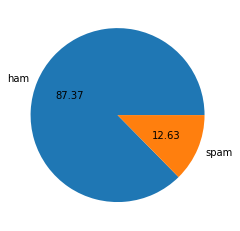

In [27]:
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")

In [28]:
#Data is imbalanced

In [29]:
import nltk

In [30]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/student/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [31]:
df['num_characters']=df['text'].apply(len)

In [32]:
df['num_characters']

0       111
1        29
2       155
3        49
4        61
       ... 
5567    161
5568     37
5569     57
5570    125
5571     26
Name: num_characters, Length: 5169, dtype: int64

In [33]:
df.head(5)

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [34]:
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [35]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [36]:
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [37]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [38]:
df.describe()

,target,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.453279,1.947185
std,0.332253,58.236293,13.324793,1.362406
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,28.000000


In [39]:
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [40]:
#spam
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [41]:
import seaborn as sns

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

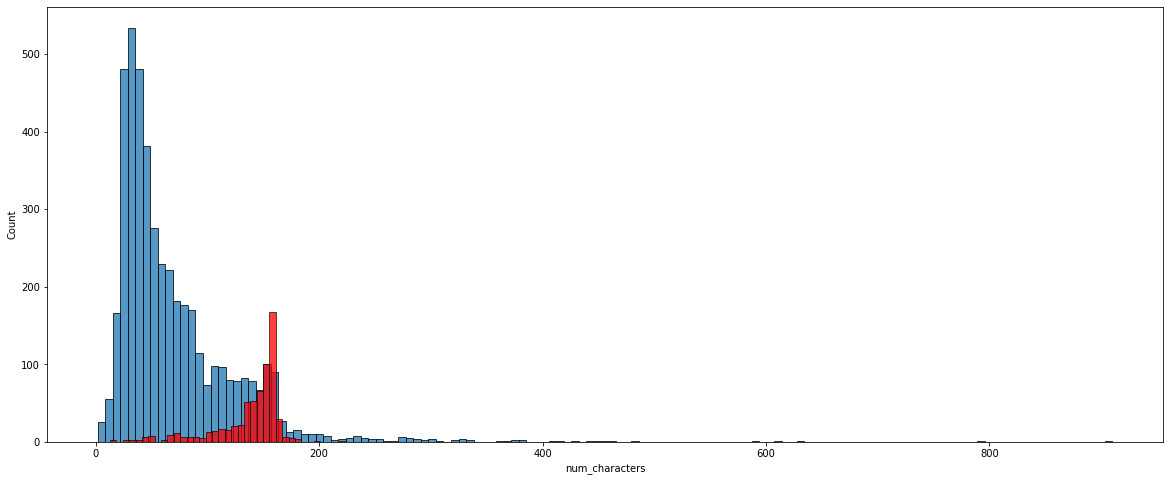

In [42]:
plt.figure(figsize=(20,8))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')

<AxesSubplot:xlabel='num_sentences', ylabel='Count'>

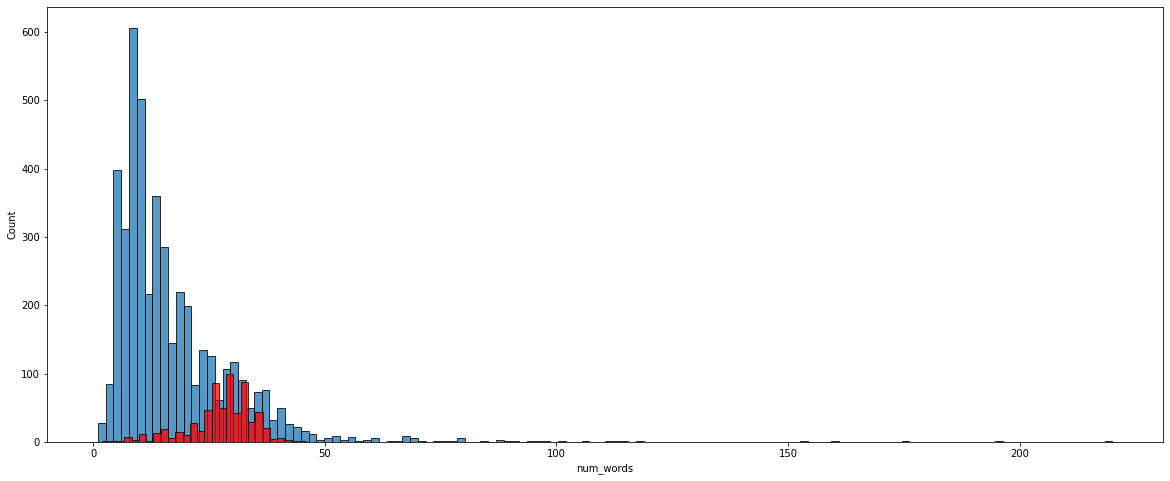

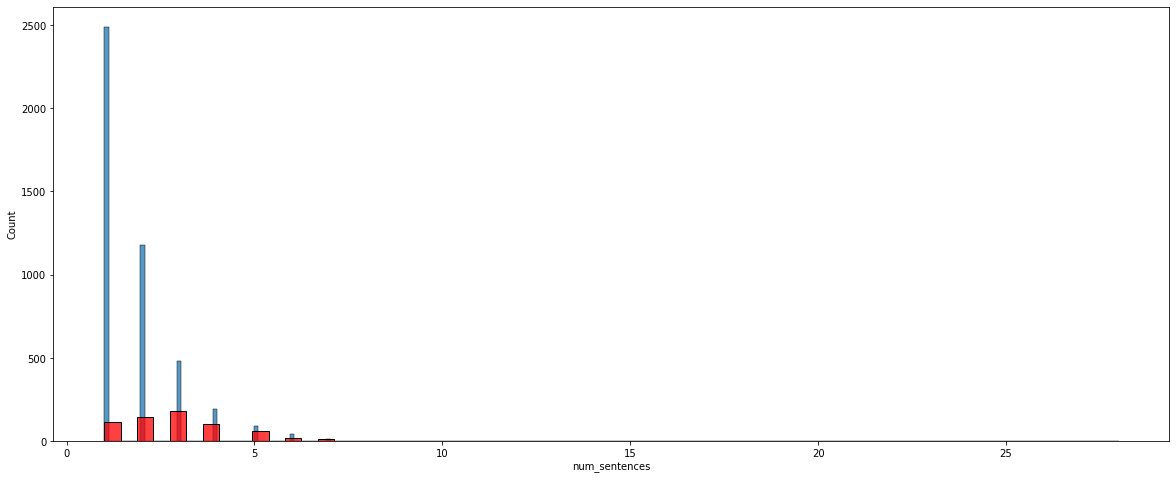

In [43]:
plt.figure(figsize=(20,8))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')
plt.figure(figsize=(20,8))
sns.histplot(df[df['target']==0]['num_sentences'])
sns.histplot(df[df['target']==1]['num_sentences'],color='red')

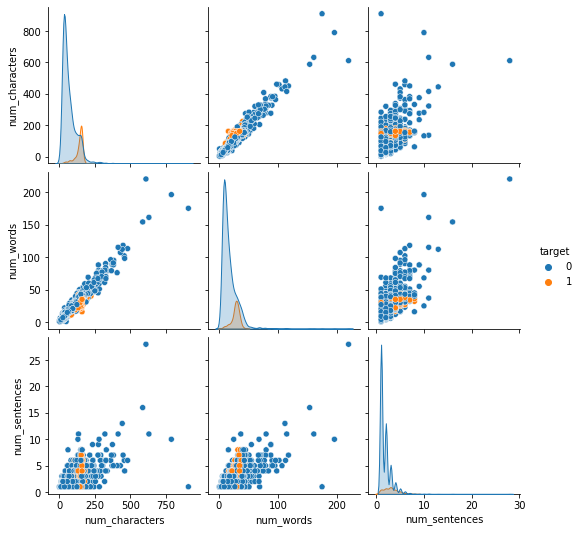

In [44]:
sns.pairplot(df,hue='target')

<AxesSubplot:>

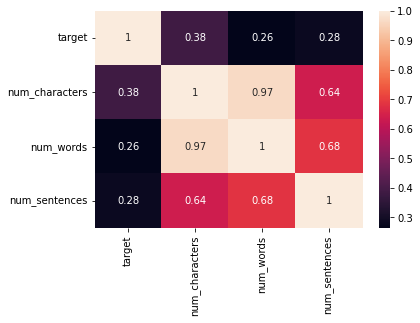

In [45]:
sns.heatmap(df.corr(),annot=True)

In [46]:
#Data preprocessing
#lower case/upper case
#tokenizing
#removing special characters
#removing stop wors and punctuation
#stemming

In [47]:
import nltk

nltk.download('punkt')


[nltk_data] Downloading package punkt to /home/student/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [48]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/student/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [49]:

from nltk.corpus import stopwords
stopwords.words('english')


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [50]:
import string
string.punctuation
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [51]:
def transform_text(text):
    text=text.lower()
    text=text.split(" ")
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)


In [52]:
transform_text("'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'")

'jurong avail bugi n great world la e cine got amor'

In [53]:
ps.stem('loving')

'love'

In [54]:
ps.stem('affordable')

'afford'

In [55]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [56]:
df['transformed_text']=df['text'].apply(transform_text)

In [57]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong avail bugi n great world la e cine g...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok joke wif u
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli u c alreadi
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe live around though


In [58]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [59]:
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

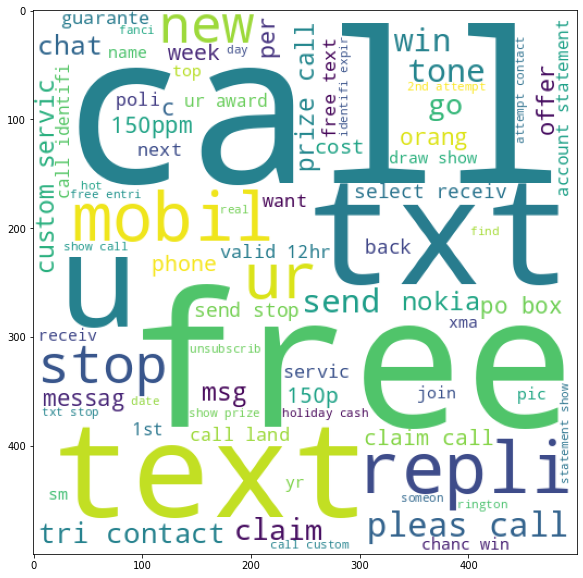

In [60]:
plt.figure(figsize=(12,10))
plt.imshow(spam_wc)

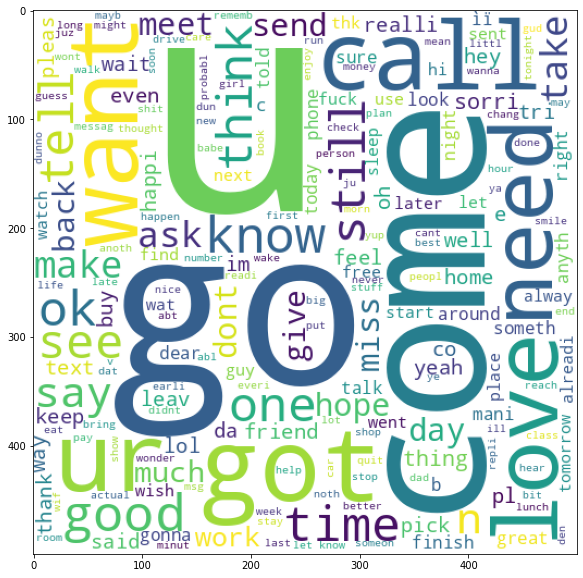

In [61]:
ham_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(12,10))
plt.imshow(ham_wc)

In [62]:
df[df['target']==0]['transformed_text'].tolist()


['go jurong avail bugi n great world la e cine got amor',
 'ok joke wif u',
 'u dun say earli u c alreadi',
 'nah think goe live around though',
 'even brother like speak treat like aid',
 'per request mell minnaminungint nurungu set callertun press copi friend callertun',
 'gonna home soon want talk stuff anymor cri enough',
 'search right word thank promis wont take help grant fulfil wonder bless',
 'date sunday',
 'oh watch',
 'eh u rememb 2 spell ye v naughti make v',
 'fine thatåõ way u thatåõ way gota b',
 'serious spell',
 'go tri 2 month ha ha joke',
 'pay first da stock',
 'aft finish lunch go str ard 3 smth u finish ur lunch',
 'alright way meet',
 'forc eat realli hungri mark get know sick turn lol',
 'lol alway',
 'catch bu fri egg make eat left dinner feel love',
 'back pack car let know room',
 'vagu rememb feel lol',
 'wait still sure sarcast x want live us',
 'yeah got 2 v n fallen actin like spoilt child got caught till go badli',
 'k tell anyth',
 'fear faint housewor

In [63]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [64]:
len(spam_corpus)

8176

In [65]:
from collections import Counter

/home/student/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


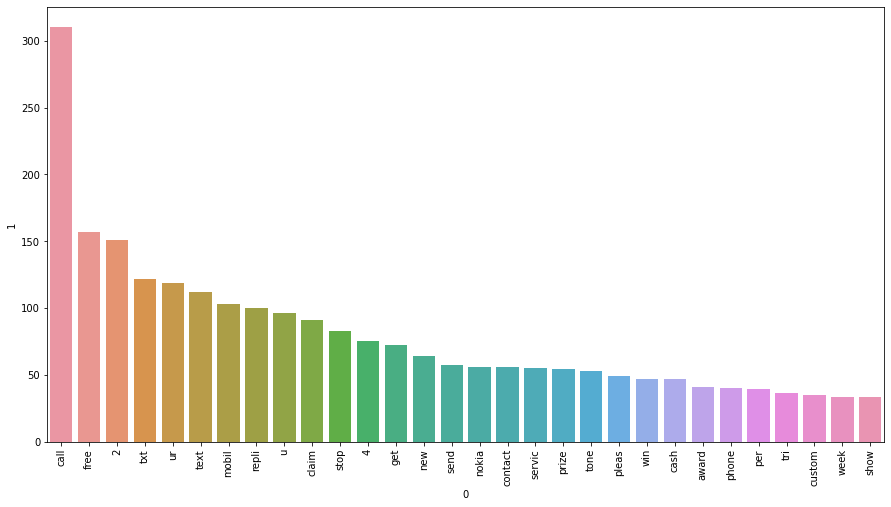

In [66]:
plt.figure(figsize=(15,8))
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [67]:
ham_corpus=[]
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)


In [68]:
len(ham_corpus)

27382

/home/student/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


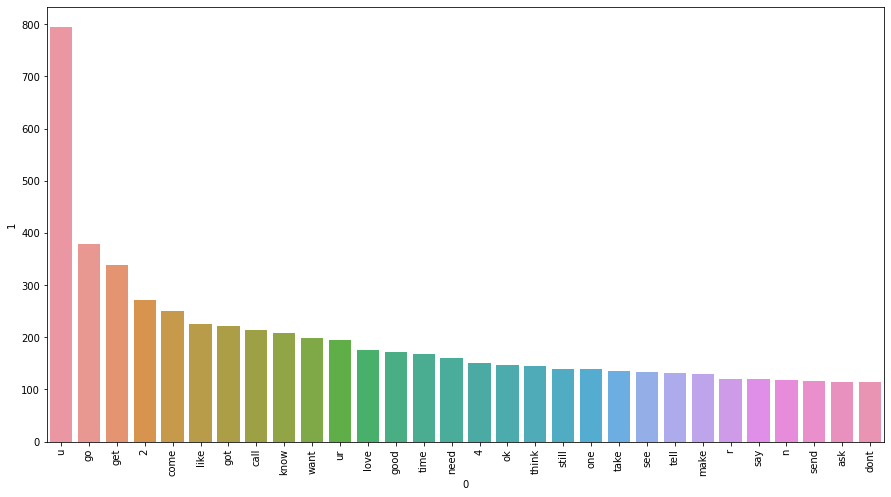

In [69]:
plt.figure(figsize=(15,8))
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [70]:
#MODEL BUILDING

In [88]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)

In [89]:
#from sklearn.linear_model import LogisticRegression
#lr=LogisticRegression(solver='liblinear',penalty='l1')

In [90]:
#X=cv.fit_transform(df['transformed_text']).toarray()
X=tfidf.fit_transform(df['transformed_text']).toarray()


In [91]:
X.shape

(5169, 3000)

In [92]:
y=df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [93]:
from sklearn.model_selection import train_test_split

In [94]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [95]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
# from sklearn.linear_model import LogisticRegression
# lrc=LogisticRegression(solver='liblinear',penalty='l1')
# lrc.fit(X_train,y_train)
# y_pred3=lrc.predict(X_test)
# print(accuracy_score(y_test,y_pred3))
# print(precision_score(y_test,y_pred3))

# from sklearn.tree import DecisionTreeClassifier
# dtc=DecisionTreeClassifier(max_depth=5)
# dtc.fit(X_train,y_train)
# y_pred3=dtc.predict(X_test)
# print(accuracy_score(y_test,y_pred3))
# print(confusion_matrix(y_test,y_pred3))
# print(precision_score(y_test,y_pred3))


In [96]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()


In [97]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.7940038684719536
[[707 189]
 [ 24 114]]
0.37623762376237624


In [98]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2)) 

0.9632495164410058
[[895   1]
 [ 37 101]]
0.9901960784313726


In [99]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9758220502901354
[[894   2]
 [ 23 115]]
0.9829059829059829


In [100]:
import pickle

In [101]:
pickle.dump(tfidf,open('vectorizer.pk1','wb'))
pickle.dump(mnb,open('model.pkl','wb'))